**Objective**

OnSports is a fantasy sports platform that has fantasy leagues for many different sports and has witnessed an increasing number of participants globally over the past 5 years. For each player, a price is set at the start, and the price keeps changing over time based on the performance of the players in the real world. With the new English Premier League season about to start, they have collected data from the past season and want to analyze it to determine the price of each player for the start of the new season. OnSports have hired you as a data scientist and asked you to conduct a cluster analysis to identify players of different potentials based on previous season performances. This will help them understand the patterns in player performances and fantasy returns and decide the exact price to be set for each player for the upcoming football season.

--------------------------
## **Data Description**
--------------------------

- **Player_Name:** Name of the player.
- **Club:** Club in which the player plays.
- **Position:** Position in which the player plays.
- **Goals_Scored:** Number of goals scored by the player in the previous season.
- **Assists:** Number of passes made by the player leading to goals in the previous season.
- **Total_Points:** Total number of fantasy points scored by the player in the previous season.
- **Minutes:** Number of minutes played by the player in the previous season.
- **Goals_Conceded:** Number of goals conceded by the player in the previous season.
- **Creativity:** A score, computed using a range of stats, that assesses player performance in terms of producing goalscoring opportunities for other players.
- **Influence:** A score, computed using a range of stats, that evaluates a player's impact on a match, taking into account actions that could directly or indirectly affect the match outcome.
- **Threat:** A score, computed using a range of stats, that gauges players who are most likely to score goals.
- **Bonus:** Total bonus points received. The three best performing players in each match receive additional bonus points based on a score computed using a range of stats. 3 points are awarded to the highest scoring player, 2 to the second best, and 1 to the third.
- **Clean_Sheets:** Number of matches without conceding a goal in the previous

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('fpl_data.csv')
df.head()

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2


In [5]:
df.shape

(476, 13)

In [6]:
df['Player_Name'].nunique()

476

In [7]:
df['Club'].nunique()

17

In [8]:
df['Club'].value_counts()

Arsenal                     30
Crystal Palace              30
Leeds United                29
West Ham United             29
Tottenham Hotspurs          29
Newcastle United            29
Leicester City              29
Manchester United           28
Chelsea                     28
Brighton and Hove Albion    28
Everton                     27
Liverpool                   27
Manchester City             27
Southampton                 27
Burnley                     27
Aston Villa                 26
Wolverhampton Wanderers     26
Name: Club, dtype: int64

In [9]:
df['Position'].value_counts()

Midfielder    195
Defender      172
Forward        64
Goalkeeper     45
Name: Position, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


In [11]:
df[df['Goals_Scored']==0].reset_index()

,index,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
2,4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2
3,5,Cedric Soares,Arsenal,Defender,0,1,28,744,11,114.8,110.8,66,3,2
4,6,Daniel Ceballos,Arsenal,Midfielder,0,4,62,1609,17,422.3,359.8,141,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,464,Owen Otasowie,Wolverhampton Wanderers,Midfielder,0,1,9,185,6,25.9,38.2,34,0,0
234,465,Patrick Cutrone,Wolverhampton Wanderers,Forward,0,0,2,23,0,0.0,0.0,4,0,0
235,471,Ruben Vinagre,Wolverhampton Wanderers,Defender,0,0,1,172,7,25.3,31.2,0,0,0
236,472,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,0,0,132,3330,51,0.0,763.6,0,12,10


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Goals_Scored,476.0,1.907563,3.455562,0.0,0.00,0.50,2.00,23.0
Assists,476.0,1.752101,2.708563,0.0,0.00,0.00,2.00,14.0
Total_Points,476.0,58.516807,51.293559,0.0,10.00,48.00,94.25,244.0
Minutes,476.0,1336.909664,1073.773995,0.0,268.75,1269.50,2256.25,3420.0
Goals_Conceded,476.0,19.157563,15.946171,0.0,4.00,18.00,31.00,68.0
Creativity,476.0,195.976050,251.478541,0.0,8.30,96.95,296.95,1414.9
Influence,476.0,294.617647,267.779681,0.0,46.50,233.10,499.50,1318.2
Threat,476.0,224.962185,318.240377,0.0,5.75,104.50,298.25,1980.0
Bonus,476.0,4.718487,6.252625,0.0,0.00,2.00,7.00,40.0
Clean_Sheets,476.0,4.745798,4.394312,0.0,0.00,4.00,8.00,19.0


In [13]:
df.isnull().sum()   # Check the nulls

Player_Name       0
Club              0
Position          0
Goals_Scored      0
Assists           0
Total_Points      0
Minutes           0
Goals_Conceded    0
Creativity        0
Influence         0
Threat            0
Bonus             0
Clean_Sheets      0
dtype: int64

In [14]:
df.duplicated().sum()   # Check the duplicates

0

In [15]:
df.describe(include = 'O')

,Player_Name,Club,Position
count,476,476,476
unique,476,17,4
top,Alex Runnarsson,Arsenal,Midfielder
freq,1,30,195


In [16]:
df[df['Creativity'] == 0].reset_index()

,index,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
2,16,Matt Macey,Arsenal,Goalkeeper,0,0,0,0,0,0.0,0.0,0,0,0
3,17,Miguel Azeez,Arsenal,Midfielder,0,0,0,0,0,0.0,0.0,0,0,0
4,26,Sokratis Papastathopoulos,Arsenal,Defender,0,0,0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,439,Lukasz Fabianski,West Ham United,Goalkeeper,0,0,133,3150,44,0.0,745.2,0,11,10
77,444,Roberto Jimenez Gago,West Ham United,Goalkeeper,0,0,0,0,0,0.0,0.0,0,0,0
78,456,John Ruddy,Wolverhampton Wanderers,Goalkeeper,0,0,4,91,1,0.0,25.4,0,0,0
79,465,Patrick Cutrone,Wolverhampton Wanderers,Forward,0,0,2,23,0,0.0,0.0,4,0,0


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df.head(3)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11


## Univariate Analyses

In [19]:
def hist_box_func(df, feature, bins):
  fig, ax = plt.subplots(2, 1, sharex = True, gridspec_kw = {'height_ratios':(1, 2)}, figsize = (10, 7))
  sns.boxplot(data = df, x = feature, showmeans = True, color = 'Orange', ax = ax[0])
  sns.histplot(data = df, x = feature, bins = bins, color = 'Green', ax = ax[1])
  ax[1].axvline(df[feature].mean(), linestyle = '--')
  ax[1].axvline(df[feature].median(), linestyle = '-.', color = 'Black')

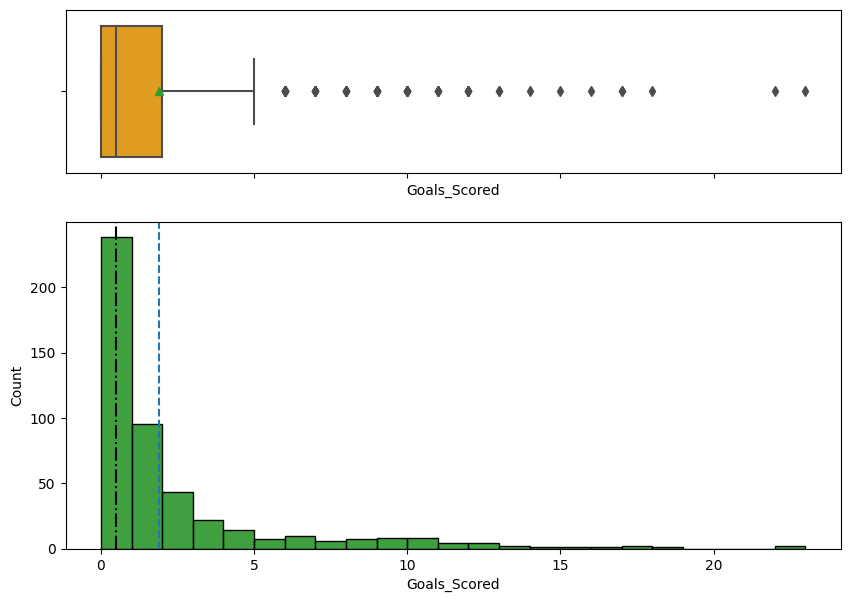

In [20]:
hist_box_func(df, 'Goals_Scored', bins = 23)

- The distribution is right-skewed and very few players have scored more than 15 goals.

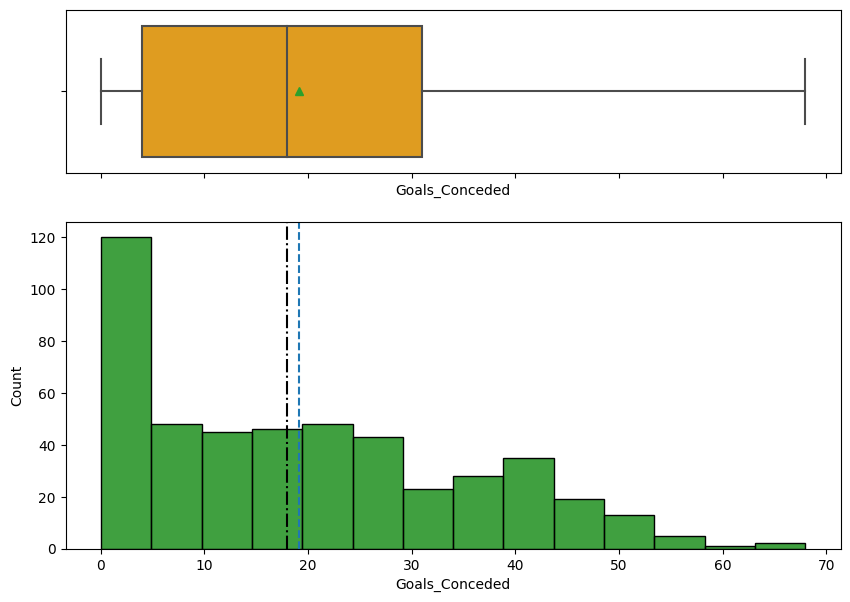

In [21]:
hist_box_func(df, 'Goals_Conceded', bins = 14)

Most players have conceded Zero goals. A few players have done 60-70 goals.

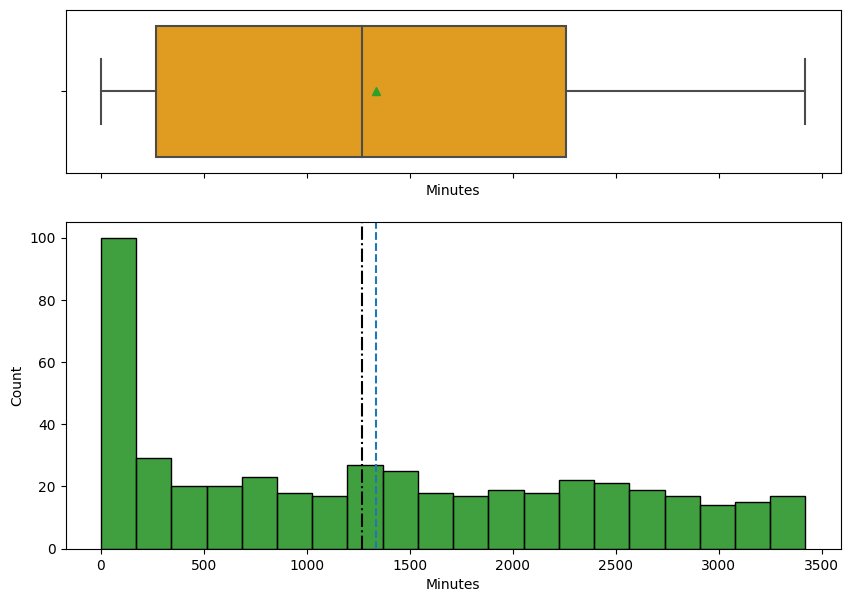

In [22]:
hist_box_func(df, 'Minutes', 20)

50% of the players played ~ 1250 or more minutes.

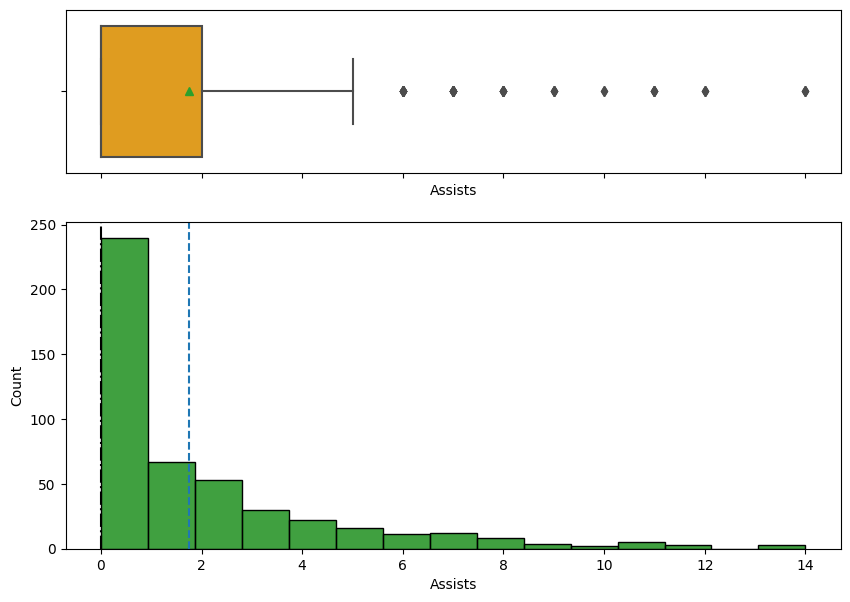

In [23]:
hist_box_func(df, 'Assists', bins = 15)

The distribution is right skewed. Most of the players have zero assists. Very few players have assisted more than 7 goals.

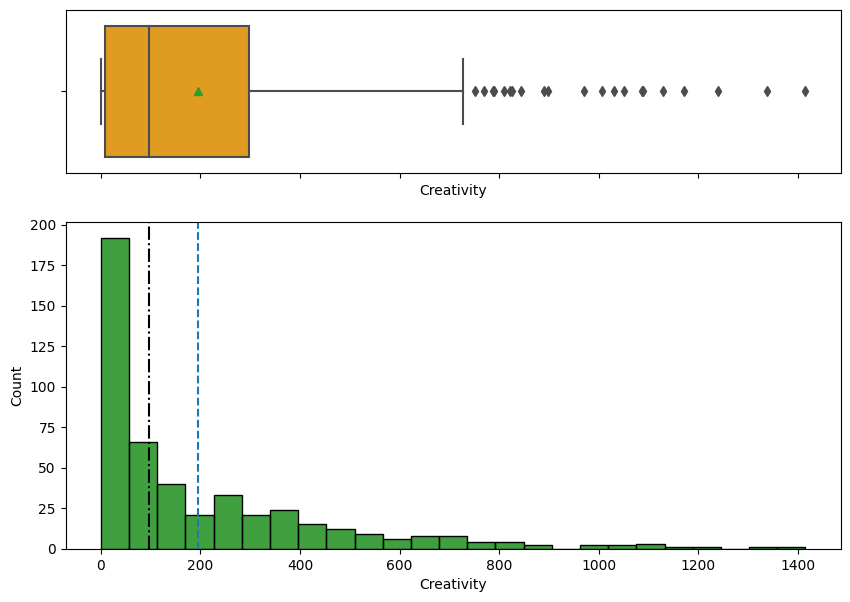

In [24]:
hist_box_func(df, 'Creativity', bins = 25)

In [25]:
df['Club']

0                      Arsenal
1                      Arsenal
2                      Arsenal
3                      Arsenal
4                      Arsenal
                ...           
471    Wolverhampton Wanderers
472    Wolverhampton Wanderers
473    Wolverhampton Wanderers
474    Wolverhampton Wanderers
475    Wolverhampton Wanderers
Name: Club, Length: 476, dtype: object

# Visualizing Categorical Variables

In [26]:
df.head(2)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7


In [27]:
def cat_chart(data, feature, rotate):
  plt.figure(figsize = (16, 5))
  ax = sns.countplot(data, x = feature, order = data.groupby([feature])['Player_Name'].count().sort_values(ascending = False).index)
  plt.xticks(rotation = rotate)
  plt.show()

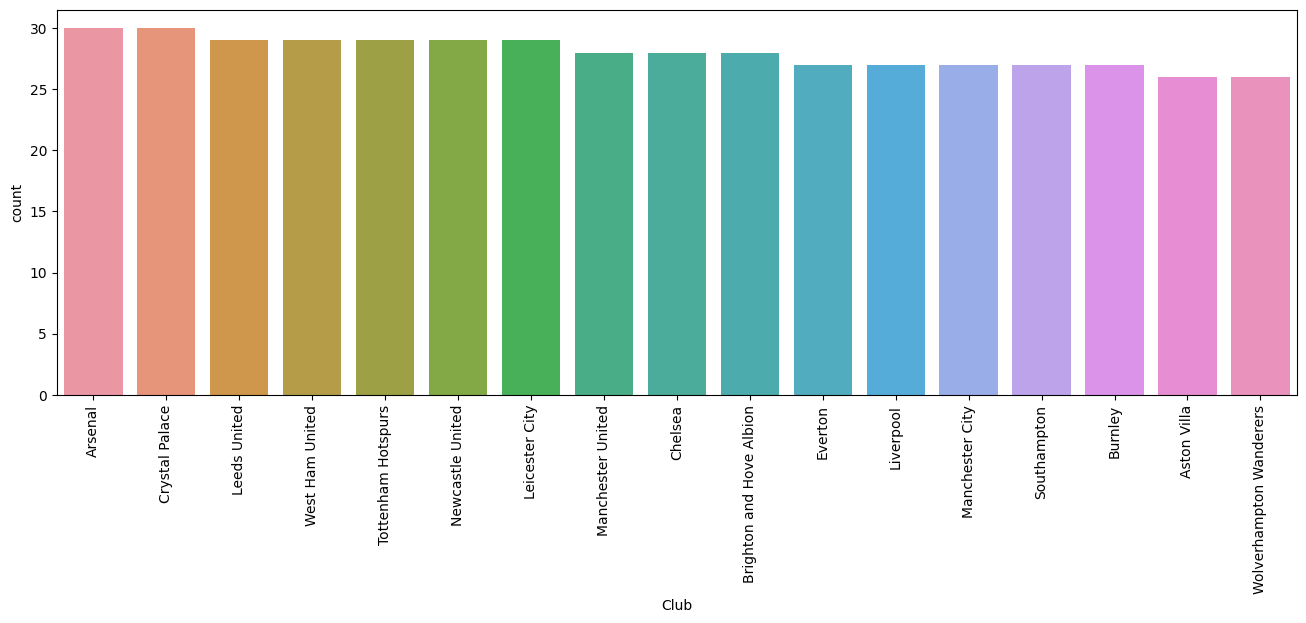

In [28]:
cat_chart(df, 'Club', 90)

The highest number of players are from Arsenal and Crystal Palace.

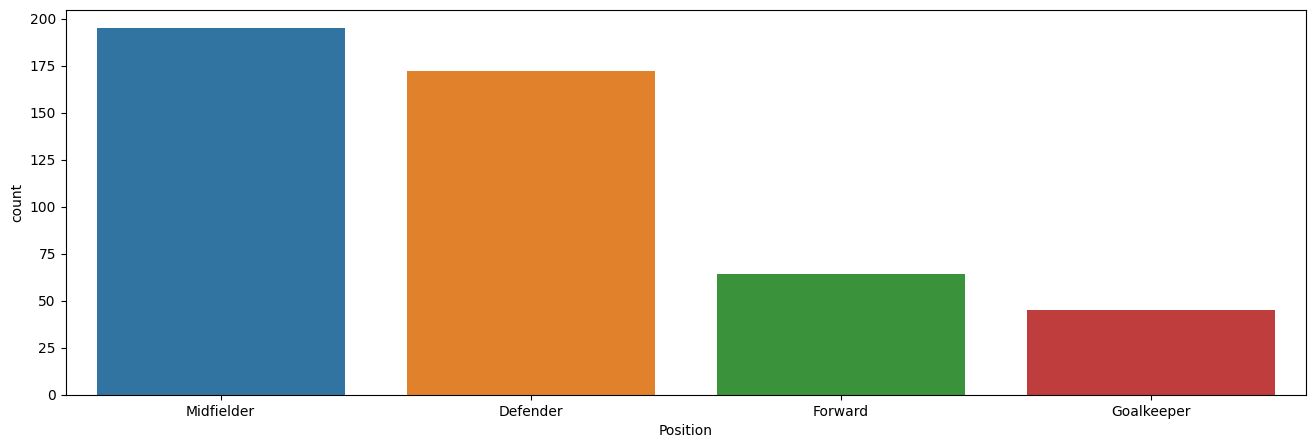

In [29]:
cat_chart(df, 'Position', None)

#**Bivariate Analyses**

<ipython-input-30-a9bbece0dece>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True, cmap= 'viridis')


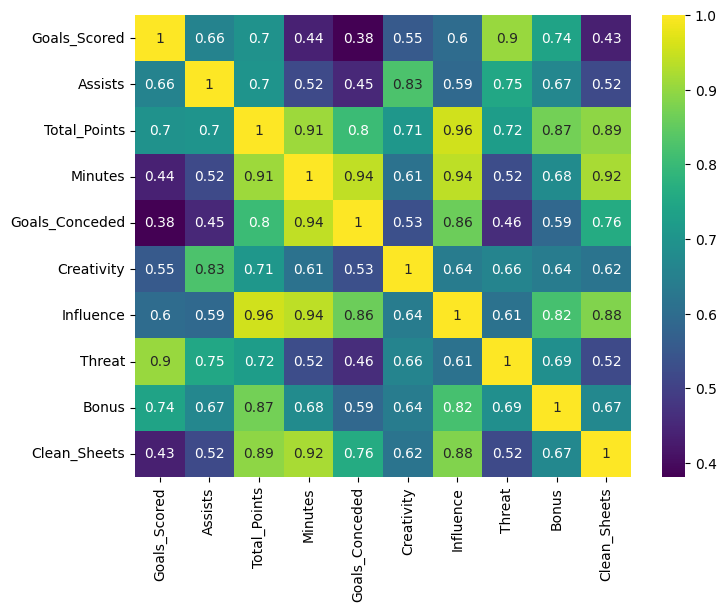

In [30]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(), annot= True, cmap= 'viridis')
plt.show()

In [31]:
df.head(1)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0


In [32]:
def barplot(data, x, y, z):
  plt.figure(figsize = (12, 5));
  sns.barplot(data = df, x = x, y = y, hue = z, ci = None, order = df.groupby([x])[y]
              .mean().sort_values(ascending = False).index);
  plt.xticks(rotation = 90, fontsize = 9);
  plt.show();

<ipython-input-32-c9f1cdb63eab>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = x, y = y, hue = z, ci = None, order = df.groupby([x])[y]


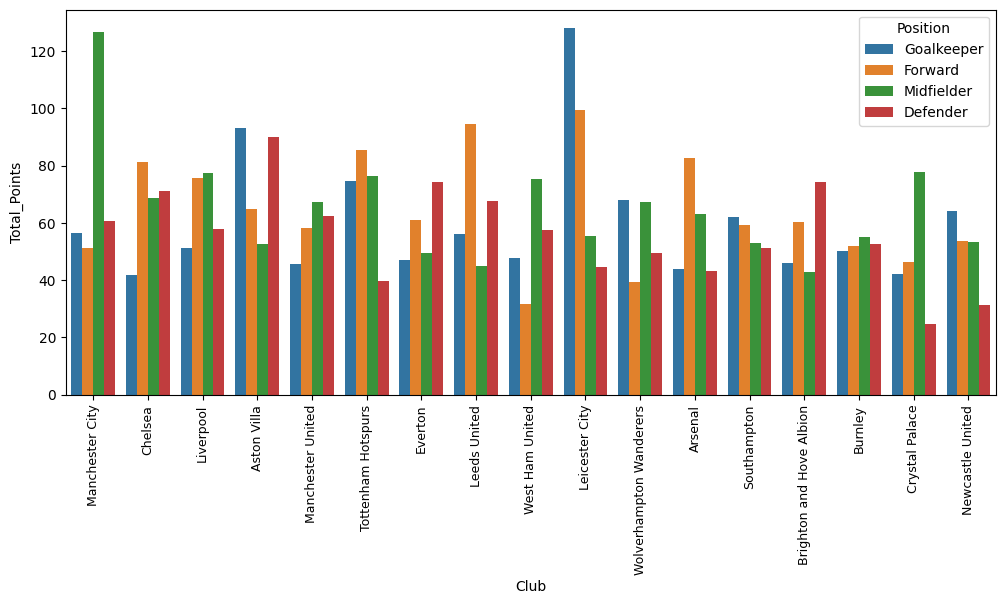

In [33]:
barplot(df, 'Club', 'Total_Points', 'Position')

<ipython-input-32-c9f1cdb63eab>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = x, y = y, hue = z, ci = None, order = df.groupby([x])[y]


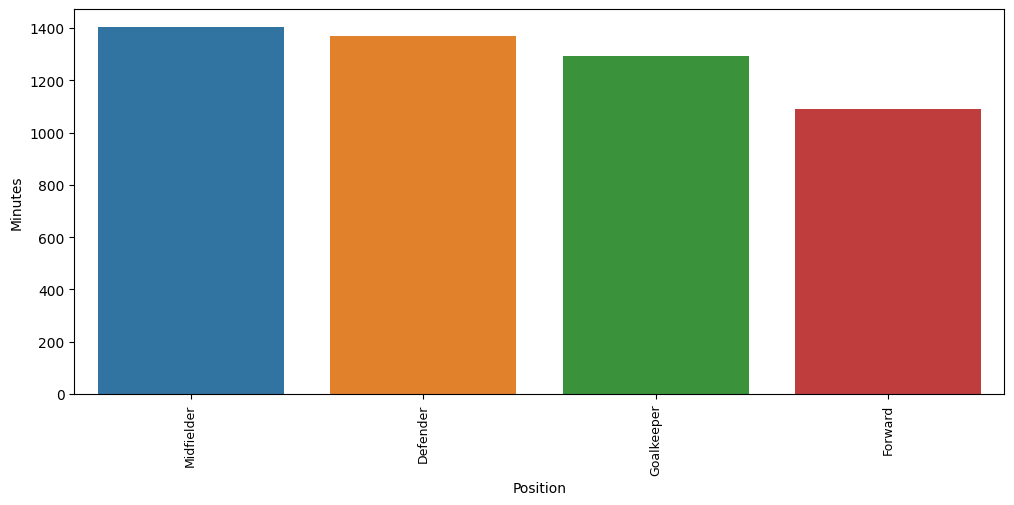

In [34]:
barplot(df, 'Position', 'Minutes', None)

In [35]:
num_cols = df.select_dtypes(np.number).columns.values
num_cols

array(['Goals_Scored', 'Assists', 'Total_Points', 'Minutes',
       'Goals_Conceded', 'Creativity', 'Influence', 'Threat', 'Bonus',
       'Clean_Sheets'], dtype=object)

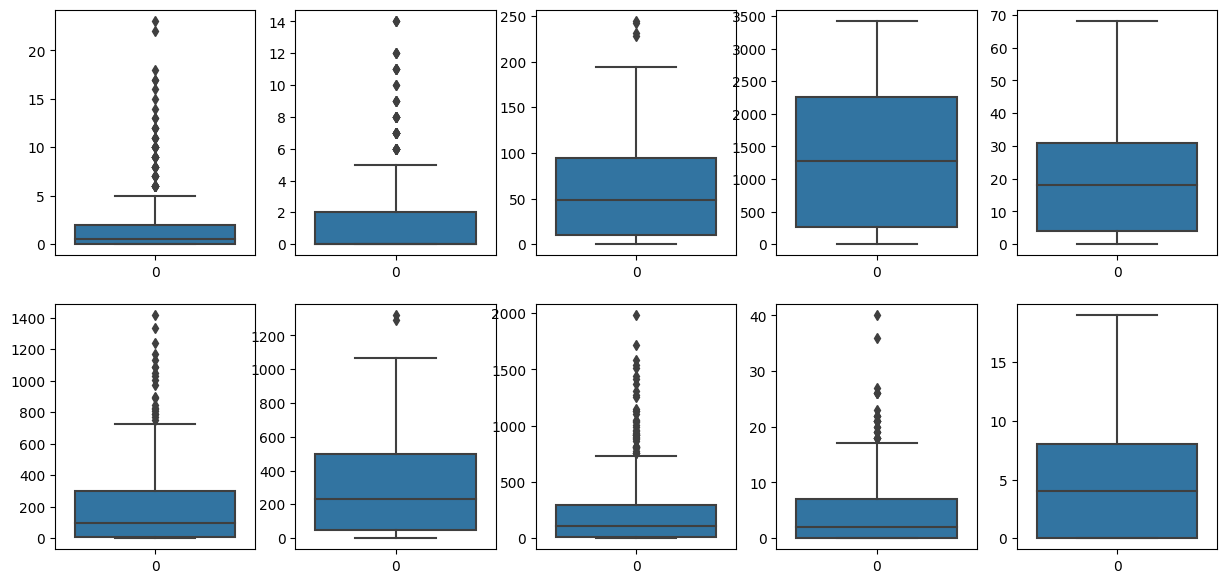

In [36]:
plt.figure(figsize = (15, 7))

for i, j in enumerate(num_cols):
  plt.subplot(2, 5, i+1)
  sns.boxplot(df[j])

In [37]:
df.head(1)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0


In [42]:
num_cols

array(['Goals_Scored', 'Assists', 'Total_Points', 'Minutes',
       'Goals_Conceded', 'Creativity', 'Influence', 'Threat', 'Bonus',
       'Clean_Sheets'], dtype=object)

# **Data Preprocessing**

In [40]:
from sklearn.preprocessing import StandardScaler. # Normalize the data
scaler = StandardScaler()

In [41]:
scaler.fit(df[num_cols])
df_scaled = scaler.transform(df[num_cols])
df_scaled

array([[-0.55260758, -0.64755534, -1.12250583, ..., -0.70763762,
        -0.75543496, -1.08112276],
       [ 3.21340088,  0.46120848,  1.37555959, ...,  1.79939343,
         2.60668787,  0.51352135],
       [-0.55260758, -0.64755534,  1.41459187, ..., -0.70134645,
         1.005677  ,  1.42474655],
       ...,
       [-0.55260758, -0.2779674 , -0.63460243, ..., -0.48115552,
        -0.75543496, -1.08112276],
       [-0.26291462, -0.2779674 , -0.36137652, ...,  0.09763208,
        -0.2751317 ,  0.05790874],
       [-0.26291462, -0.2779674 ,  0.18507529, ..., -0.13514119,
        -0.11503061,  0.28571505]])

In [45]:
df_scaled = pd.DataFrame(df_scaled, columns=num_cols)
df_scaled.head()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510


# **Principal Component Analyses**

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components = df_scaled.shape[1], random_state = 1)
pca.fit(df_scaled)
pca.transform(df_scaled)

array([[-2.91660039e+00,  5.69939118e-01, -4.18712595e-02, ...,
         6.47566658e-02,  5.74859356e-02,  6.26943054e-03],
       [ 3.81546834e+00,  1.99955411e+00, -2.21634470e+00, ...,
        -2.93053163e-01,  7.53558084e-02, -2.38019311e-01],
       [ 1.94339593e+00, -2.75744591e+00, -9.58237952e-01, ...,
         1.38392431e-01, -3.06182535e-01, -1.36656097e-01],
       ...,
       [-1.96663002e+00,  4.69243202e-01,  4.74988602e-01, ...,
         1.29321223e-01, -2.67968759e-01, -1.72718624e-02],
       [-8.17999711e-01,  1.80940456e-01,  1.03095534e-01, ...,
        -3.00399145e-01, -7.70535354e-04, -6.88056996e-02],
       [ 2.61543522e-01, -1.03286940e+00, -4.17138579e-01, ...,
         1.12067963e-01,  2.90157536e-02,  2.17703985e-03]])

In [75]:
df_pca = pd.DataFrame(pca.transform(df_scaled))
df_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-2.916600,0.569939,-0.041871,0.190663,0.003485,0.008158,-0.042314,0.064757,0.057486,0.006269
1,3.815468,1.999554,-2.216345,0.757341,-0.119000,-0.541975,-0.233941,-0.293053,0.075356,-0.238019
2,1.943396,-2.757446,-0.958238,0.816920,0.041188,0.376978,0.005235,0.138392,-0.306183,-0.136656
3,3.502427,1.043441,0.581995,-0.969567,0.415848,-0.358456,0.661746,0.376272,-0.260200,-0.155934
4,-1.153639,0.422189,0.642307,0.269271,-0.271583,0.405367,-0.033575,0.098886,-0.035234,-0.034877


In [76]:
sum((df_pca.var()/sum(df_pca.var()))[0:5])

0.971012324979608

About 97% of the variance in the dataset is defined by the first 6 principal components

# **Cluster Analyses**

In [77]:
from sklearn.cluster import KMeans

In [78]:
clusters = range(1, 10)

In [79]:
from scipy.spatial.distance import cdist
distortion = []

for k in clusters:

  model = KMeans(n_clusters = k)
  model.fit(df_pca)
  y = model.predict(df_pca)

  distortion.append(
  sum(np.min(cdist(df_pca, model.cluster_centers_), axis = 1))/df_pca.shape[0]
  )


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow Analyses')

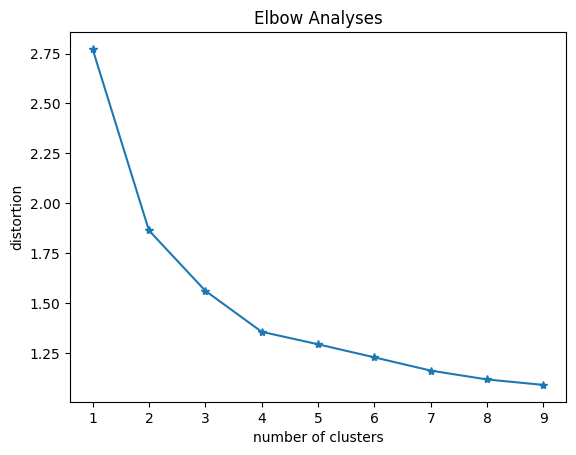

In [80]:
plt.plot(clusters, distortion, '-*')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.title('Elbow Analyses')

In [81]:
model_final = KMeans(n_clusters = 4)
model_final.fit(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [82]:
clusters_prediction = model_final.predict(df_pca)
clusters_prediction

array([3, 2, 0, 2, 1, 3, 1, 1, 3, 1, 1, 3, 0, 0, 0, 1, 3, 3, 1, 2, 3, 2,
       3, 0, 3, 3, 3, 1, 3, 1, 3, 2, 2, 3, 3, 0, 0, 0, 3, 2, 3, 3, 0, 3,
       3, 3, 1, 3, 0, 0, 3, 2, 3, 1, 0, 3, 1, 1, 0, 1, 3, 3, 0, 3, 1, 1,
       3, 3, 3, 3, 0, 3, 2, 0, 1, 2, 2, 3, 3, 0, 1, 1, 1, 0, 3, 1, 0, 3,
       0, 0, 2, 3, 0, 1, 1, 0, 1, 1, 3, 3, 1, 3, 0, 3, 3, 1, 0, 0, 3, 1,
       3, 1, 1, 0, 3, 1, 0, 1, 0, 3, 3, 3, 1, 0, 1, 3, 3, 0, 1, 2, 1, 1,
       1, 0, 1, 0, 2, 3, 3, 0, 0, 2, 3, 2, 1, 3, 1, 1, 3, 3, 3, 1, 0, 1,
       0, 3, 3, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1, 0, 2, 0, 1, 1, 1, 3, 0, 3,
       3, 2, 3, 2, 2, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 2, 3, 1, 1, 1, 3, 1,
       0, 3, 3, 1, 3, 0, 2, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3, 1, 2,
       2, 1, 2, 2, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 2, 3, 0, 2, 2, 0, 0, 2,
       3, 1, 1, 1, 3, 3, 0, 3, 3, 0, 0, 2, 3, 3, 0, 2, 3, 1, 1, 1, 3, 0,
       0, 1, 3, 1, 3, 2, 3, 1, 3, 3, 3, 2, 2, 1, 2, 3, 3, 1, 1, 0, 0, 3,
       1, 1, 2, 2, 0, 0, 2, 1, 3, 3, 3, 3, 1, 2, 2,

In [83]:
df_pca.head(1)

,0,1,2,3,4,5,6,7,8,9
0,-2.9166,0.569939,-0.041871,0.190663,0.003485,0.008158,-0.042314,0.064757,0.057486,0.006269


<Axes: xlabel='0', ylabel='1'>

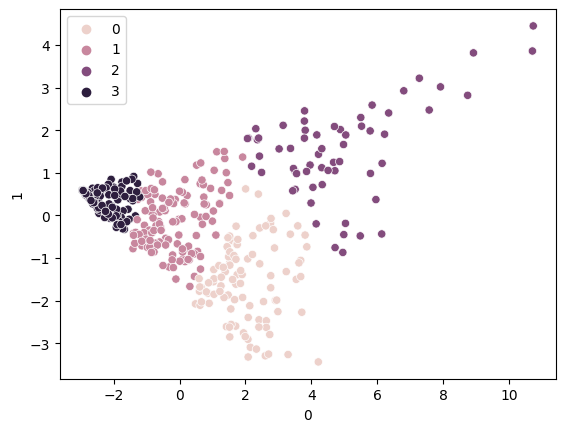

In [84]:
sns.scatterplot(x = df_pca.iloc[:,0], y = df_pca.iloc[:, 1], hue = clusters_prediction)

In [85]:
df_pca['cluster'] = clusters_prediction
df_pca.head(2)

,0,1,2,3,4,5,6,7,8,9,cluster
0,-2.916600,0.569939,-0.041871,0.190663,0.003485,0.008158,-0.042314,0.064757,0.057486,0.006269,3
1,3.815468,1.999554,-2.216345,0.757341,-0.119000,-0.541975,-0.233941,-0.293053,0.075356,-0.238019,2


In [86]:
df.head(1)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0


In [89]:
df_scaled.head(1)  #standard scaler on df

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123


In [92]:
df_pca.head(1) # standard scaler and PCA transformnation on df

,0,1,2,3,4,5,6,7,8,9,cluster
0,-2.9166,0.569939,-0.041871,0.190663,0.003485,0.008158,-0.042314,0.064757,0.057486,0.006269,3


In [93]:
model_kmeans = model_final

In [97]:
df_kmeans = df_scaled.copy()
df_kmeans['labels'] = model_kmeans.labels_
df_kmeans.head()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,labels
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123,3
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521,2
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747,0
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328,2
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510,1


In [103]:
cluster_kmeans = df_kmeans.groupby(['labels']).mean()
cluster_kmeans['Count'] = df_kmeans.groupby(['labels'])['Goals_Scored'].count()

In [105]:
cluster_kmeans.style.highlight_max()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Count
labels,,,,,,,,,,,
0,-0.157572,0.046822,0.878391,1.243324,1.153068,0.277435,1.063813,-0.079665,0.473624,1.201542,99
1,-0.129384,-0.055637,-0.055979,0.048985,0.087707,-0.033131,-0.091889,-0.021532,-0.225100,-0.013281,128
2,2.097371,1.806266,1.620631,1.034634,0.890598,1.677926,1.363399,2.062179,1.829804,1.017683,61
3,-0.509462,-0.572851,-0.950286,-1.023786,-0.955887,-0.667973,-0.940016,-0.612500,-0.689862,-0.953891,188


The above shows us that cluster 2 has players with maximum goals scored, assists and total points on average.

In [106]:
cluster_kmeans.style.highlight_min(color = 'lightgreen')

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Count
labels,,,,,,,,,,,
0,-0.157572,0.046822,0.878391,1.243324,1.153068,0.277435,1.063813,-0.079665,0.473624,1.201542,99
1,-0.129384,-0.055637,-0.055979,0.048985,0.087707,-0.033131,-0.091889,-0.021532,-0.225100,-0.013281,128
2,2.097371,1.806266,1.620631,1.034634,0.890598,1.677926,1.363399,2.062179,1.829804,1.017683,61
3,-0.509462,-0.572851,-0.950286,-1.023786,-0.955887,-0.667973,-0.940016,-0.612500,-0.689862,-0.953891,188


The above shows us that cluster 3 has players with minimum goals scored, assists and total points on average. These might be the least valuable players.

# **K-Medoid Cluster Analyses**

In [107]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.6 MB/s eta 0:00:00


In [111]:
from sklearn_extra.cluster import KMedoids

In [112]:
model_kmedoids = KMedoids(n_clusters= 4)
model_kmedoids.fit(df_pca)
model_kmedoids

KMedoids(n_clusters=4)

In [113]:
model_kmedoids.labels_

array([0, 3, 3, 3, 1, 0, 1, 2, 0, 1, 2, 0, 3, 3, 3, 1, 0, 0, 2, 3, 0, 3,
       0, 3, 0, 0, 0, 1, 0, 1, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0,
       0, 0, 1, 0, 3, 3, 0, 3, 0, 3, 3, 0, 1, 1, 3, 1, 0, 0, 3, 0, 2, 3,
       0, 0, 0, 0, 3, 0, 3, 3, 2, 3, 3, 0, 0, 3, 1, 1, 1, 3, 0, 1, 3, 0,
       3, 3, 3, 0, 3, 1, 2, 3, 1, 2, 0, 0, 1, 0, 3, 0, 0, 1, 3, 3, 0, 1,
       0, 2, 1, 3, 0, 1, 3, 1, 3, 0, 0, 0, 1, 3, 1, 0, 0, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 0, 0, 3, 3, 3, 0, 3, 2, 0, 2, 2, 0, 0, 0, 1, 2, 3,
       3, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 3, 3, 3, 1, 2, 1, 0, 3, 0,
       0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 1, 2, 2, 0, 2,
       3, 0, 0, 1, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 2, 3, 0, 3, 0, 0, 2, 3,
       3, 2, 1, 3, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3,
       0, 3, 2, 1, 0, 0, 3, 0, 0, 2, 3, 3, 0, 0, 3, 3, 0, 1, 2, 1, 0, 3,
       3, 1, 0, 1, 0, 3, 0, 1, 0, 0, 0, 3, 3, 1, 3, 0, 0, 1, 1, 3, 3, 0,
       1, 1, 3, 3, 3, 3, 3, 1, 0, 0, 0, 0, 1, 3, 3,

In [115]:
df_kmedoids = df_scaled.copy()
df_kmedoids['labels'] = model_kmedoids.labels_
df_kmedoids.head()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,labels
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123,0
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521,3
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747,3
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328,3
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510,1


In [123]:
profile_kmedoids = df_kmedoids.groupby(['labels']).mean()
profile_kmedoids['count_players'] = df_kmedoids.groupby(['labels'])['Goals_Scored'].count().values

profile_kmedoids

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_players
labels,,,,,,,,,,,
0,-0.509462,-0.572851,-0.950286,-1.023786,-0.955887,-0.667973,-0.940016,-0.612500,-0.689862,-0.953891,188
1,0.059369,0.151679,0.026019,-0.063474,-0.130737,0.147400,-0.147693,0.183939,-0.111028,0.012347,80
2,-0.365159,-0.495372,-0.139428,0.271650,0.499710,-0.448292,0.119165,-0.391229,-0.303385,-0.062695,51
3,0.698423,0.769591,1.169956,1.170035,1.048920,0.870380,1.162173,0.766800,0.981203,1.156312,157


In [121]:
profile_kmedoids.style.highlight_max()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_players
labels,,,,,,,,,,,
0,-0.509462,-0.572851,-0.950286,-1.023786,-0.955887,-0.667973,-0.940016,-0.612500,-0.689862,-0.953891,188
1,0.059369,0.151679,0.026019,-0.063474,-0.130737,0.147400,-0.147693,0.183939,-0.111028,0.012347,80
2,-0.365159,-0.495372,-0.139428,0.271650,0.499710,-0.448292,0.119165,-0.391229,-0.303385,-0.062695,51
3,0.698423,0.769591,1.169956,1.170035,1.048920,0.870380,1.162173,0.766800,0.981203,1.156312,157


In [122]:
profile_kmedoids.style.highlight_min(color = 'lightgreen')

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_players
labels,,,,,,,,,,,
0,-0.509462,-0.572851,-0.950286,-1.023786,-0.955887,-0.667973,-0.940016,-0.612500,-0.689862,-0.953891,188
1,0.059369,0.151679,0.026019,-0.063474,-0.130737,0.147400,-0.147693,0.183939,-0.111028,0.012347,80
2,-0.365159,-0.495372,-0.139428,0.271650,0.499710,-0.448292,0.119165,-0.391229,-0.303385,-0.062695,51
3,0.698423,0.769591,1.169956,1.170035,1.048920,0.870380,1.162173,0.766800,0.981203,1.156312,157
